In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\SMART COM\Desktop\retail_store_inventory.csv")


In [24]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [29]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (73100, 15)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [33]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [34]:
df.drop_duplicates(inplace=True)

In [36]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after filling:\n", df.isnull().sum())

print("\nCleaned data preview:")
print(df.head())


C:\Users\SMART COM\AppData\Local\Temp\ipykernel_6744\2272701552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\SMART COM\AppData\Local\Temp\ipykernel_6744\2272701552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Missing values after filling:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Cleaned data preview:
         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20

In [43]:
print(df.columns)


Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing',
       'Date_2022-01-02', 'Date_2022-01-03',
       ...
       'Category_Toys', 'Region_North', 'Region_South', 'Region_West',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object', length=755)


In [44]:
from sklearn.model_selection import train_test_split

# 1. Set target variable
target = 'Demand Forecast'

# 2. Set feature variables (all except target)
X = df.drop(columns=[target])
y = df[target]

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Confirm shapes
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (58480, 754)
Test Features Shape: (14620, 754)
Training Labels Shape: (58480,)
Test Labels Shape: (14620,)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 75.87
Mean Absolute Error (MAE): 7.51
R^2 Score: 0.9936


In [46]:
# Compare actual vs predicted for first 10 test records
comparison_df = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(comparison_df)


   Actual   Predicted
0  139.31  142.913634
1  117.55  110.772482
2   78.51   73.615660
3  103.11  108.492601
4   92.47   81.264668
5  222.51  211.709726
6   91.25   93.294071
7   56.67   58.232094
8  139.11  134.588235
9   46.45   59.461163


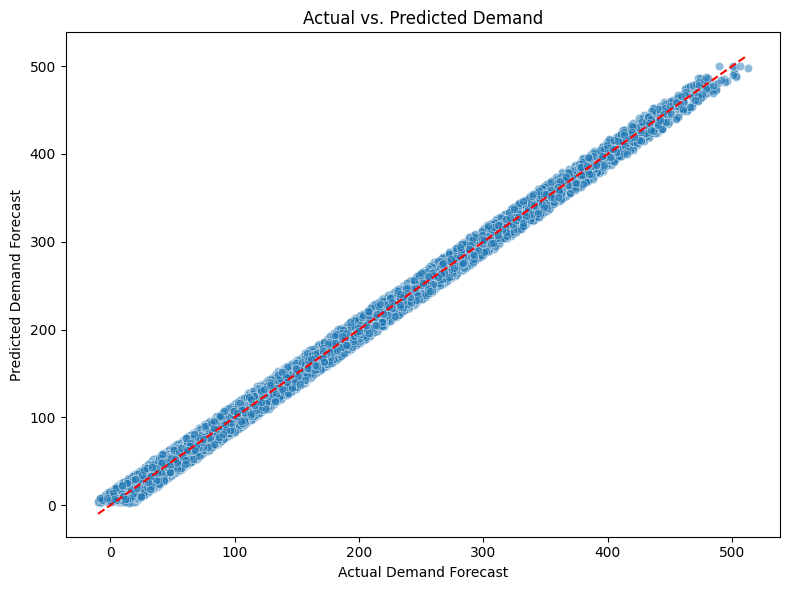

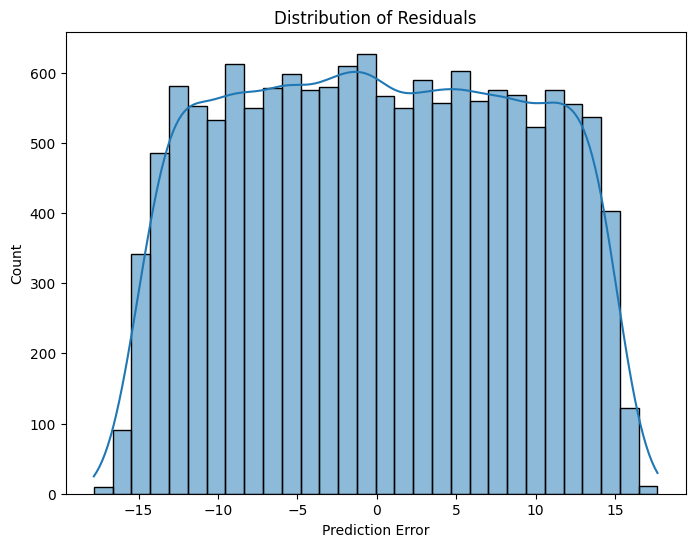

In [47]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs. Predicted Demand")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.tight_layout()
plt.show()

# 2. Residual plot (optional)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()
